<a href="https://colab.research.google.com/github/gan0606/deproy_test/blob/main/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

### データの読み込み

# ローカル環境またはGoogleColab環境で実行いただけます  
* ご自分に適した環境で実行してください  
* ローカル環境で実行される場合は1つ下のcodeセルのコメントアウトを外して、2つ下のcodeセルのをコメントアウトしてください

## ローカル環境で実行する場合

In [ ]:
# train_data = pd.read_csv("datasets/train.csv")
# test_data = pd.read_csv("datasets/test.csv")

## GoogleColabで実行する場合

In [ ]:
# googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

# データの読み込み
train_data = pd.read_csv("/content/drive/MyDrive/deproy_test-main/datasets/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/deproy_test-main/datasets/test.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### データの前処理

In [ ]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# 乗客の名前やチケットなどは学習に使わないの削除する
# また、PassengerIdは提出データに使うのでそれは残す

test_id = test_data["PassengerId"]

# 学習で使う特徴量
labels = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train_data = train_data[labels + ["Survived"]]
test_data = test_data[labels]
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [ ]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


### 欠損値の処理

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [ ]:
train_data.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Survived      0
dtype: int64

In [ ]:
test_data.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

### Ageの欠損値を処理

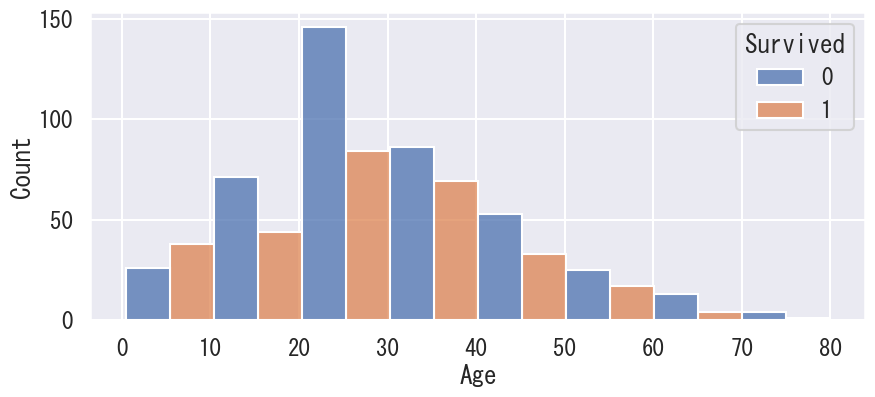

In [ ]:
# Ageの分布を確認
fig = plt.figure(figsize=(10, 4))
sns.histplot(data=train_data, x="Age", hue="Survived", bins=8, multiple="dodge")
plt.show()

### 幅広く正規分布で近い形で分布しているのでAgeの欠損値にはtrain_dataの平均値 ± 2 * 標準偏差をrandomに振る

In [ ]:
std = train_data["Age"].std()
ave = train_data["Age"].mean()

In [ ]:
np.random.seed(0)
train_data["Age"].fillna(np.random.randint(ave-2*std, ave+2*std), inplace=True)
train_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

In [ ]:
np.random.seed(0)
test_data["Age"].fillna(np.random.randint(ave-2*std, ave+2*std), inplace=True)
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

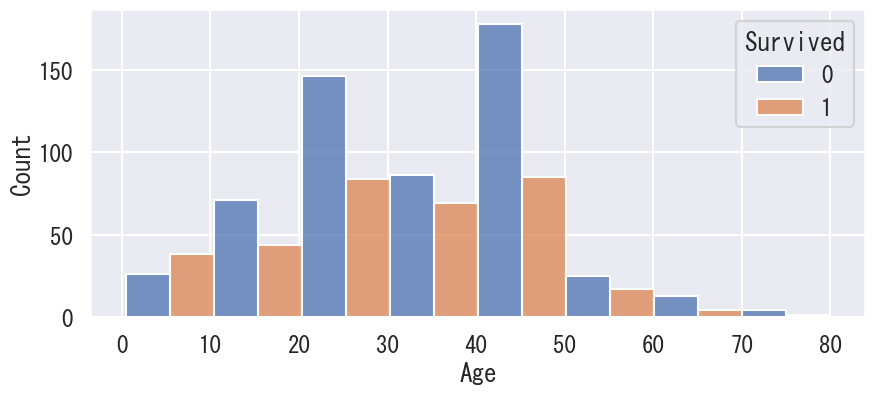

In [ ]:
# Ageのtrain_dataの分布を再確認
fig = plt.figure(figsize=(10, 4))
sns.histplot(data=train_data, x="Age", hue="Survived", bins=8, multiple="dodge")
plt.show()

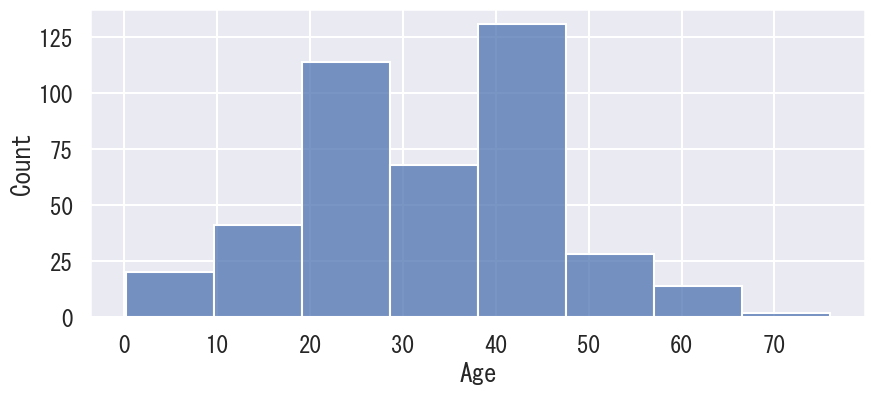

In [ ]:
# Ageのtest_dataの分布
fig = plt.figure(figsize=(10, 4))
sns.histplot(data=test_data, x="Age", bins=8)
plt.show()

### Fareの欠損値の補完

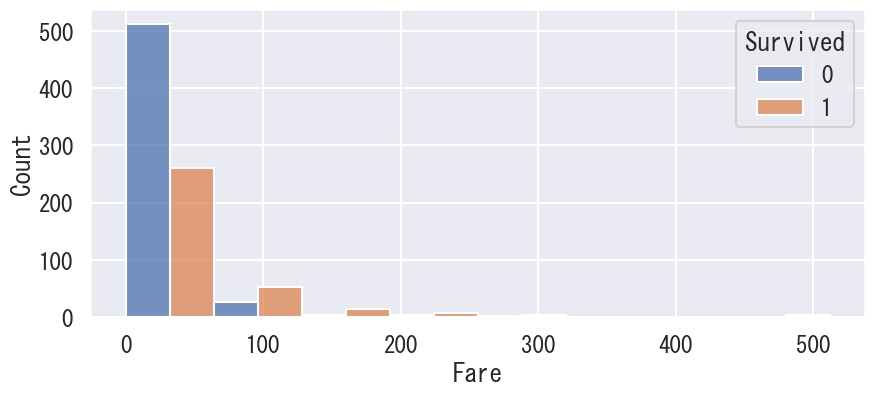

In [ ]:
# Fareの分布を確認
fig = plt.figure(figsize=(10, 4))
sns.histplot(data=train_data, x="Fare", hue="Survived", bins=8, multiple="dodge")
plt.show()

### Fareについてはtest_dataに1件だけnull値があるので、それはtrain_dataの平均値で補完する

In [ ]:
fare_mean = train_data["Fare"].mean()
fare_mean

32.204207968574636

In [ ]:
test_data["Fare"].isnull().sum()

1

In [ ]:
test_data["Fare"].fillna(fare_mean, inplace=True)
test_data["Fare"].isnull().sum()

0

### Embarkedの欠損値を補完

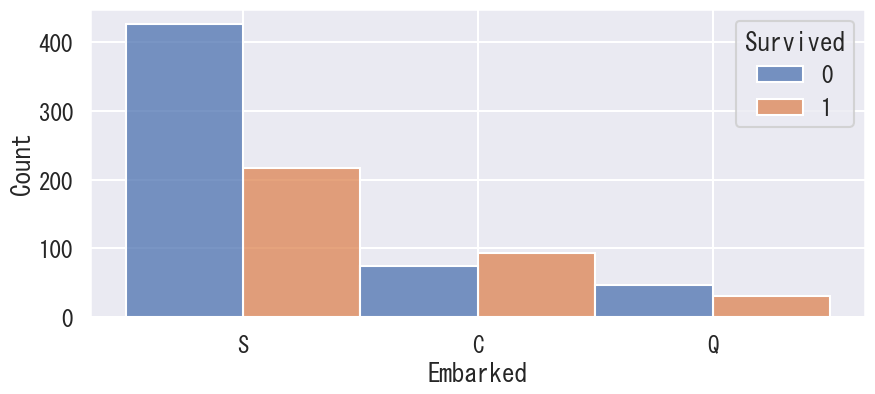

In [ ]:
# 分布の確認
fig = plt.figure(figsize=(10, 4))
sns.histplot(data=train_data, x="Embarked", hue="Survived", bins=8, multiple="dodge")
plt.show()

## Categoricalな特徴量は最頻値で補完することが多い

In [ ]:
train_data["Embarked"].fillna("S", inplace=True)

In [ ]:
train_data["Embarked"].isnull().sum()

0

### get_dummies関数を使ってcategoricalな特徴量を0か1にする

In [ ]:
train_data.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Survived'],
      dtype='object')

In [ ]:
cat_labels = ["Sex", "Pclass", "Embarked"]
train_data = pd.get_dummies(train_data, columns=cat_labels)
test_data = pd.get_dummies(test_data, columns=cat_labels)
train_data.head()

,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,False,True,False,False,True,False,False,True
1,38.0,1,0,71.2833,1,True,False,True,False,False,True,False,False
2,26.0,0,0,7.9250,1,True,False,False,False,True,False,False,True
3,35.0,1,0,53.1000,1,True,False,True,False,False,False,False,True
4,35.0,0,0,8.0500,0,False,True,False,False,True,False,False,True


### modelの訓練

In [ ]:
# 正解データの用意
y_train = train_data["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# 説明変数のtraindata
X_train = train_data.drop(labels=["Survived"], axis=1)
X_train.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,False,True,False,False,True,False,False,True
1,38.0,1,0,71.2833,True,False,True,False,False,True,False,False
2,26.0,0,0,7.9250,True,False,False,False,True,False,False,True
3,35.0,1,0,53.1000,True,False,True,False,False,False,False,True
4,35.0,0,0,8.0500,False,True,False,False,True,False,False,True


In [ ]:
# 説明変数のtest_data
X_test = test_data
X_test.head()

,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0,0,7.8292,False,True,False,False,True,False,True,False
1,47.0,1,0,7.0000,True,False,False,False,True,False,False,True
2,62.0,0,0,9.6875,False,True,False,True,False,False,True,False
3,27.0,0,0,8.6625,False,True,False,False,True,False,False,True
4,22.0,1,1,12.2875,True,False,False,False,True,False,False,True


In [ ]:
# import
from sklearn.ensemble import  RandomForestClassifier

# インスタンスの生成
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

# modelの訓練
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=0)

array([0, 1, 0, 0, 1], dtype=int64)

### treeの可視化

In [ ]:
labels

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [ ]:
X_train.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [ ]:
train_labels = ['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

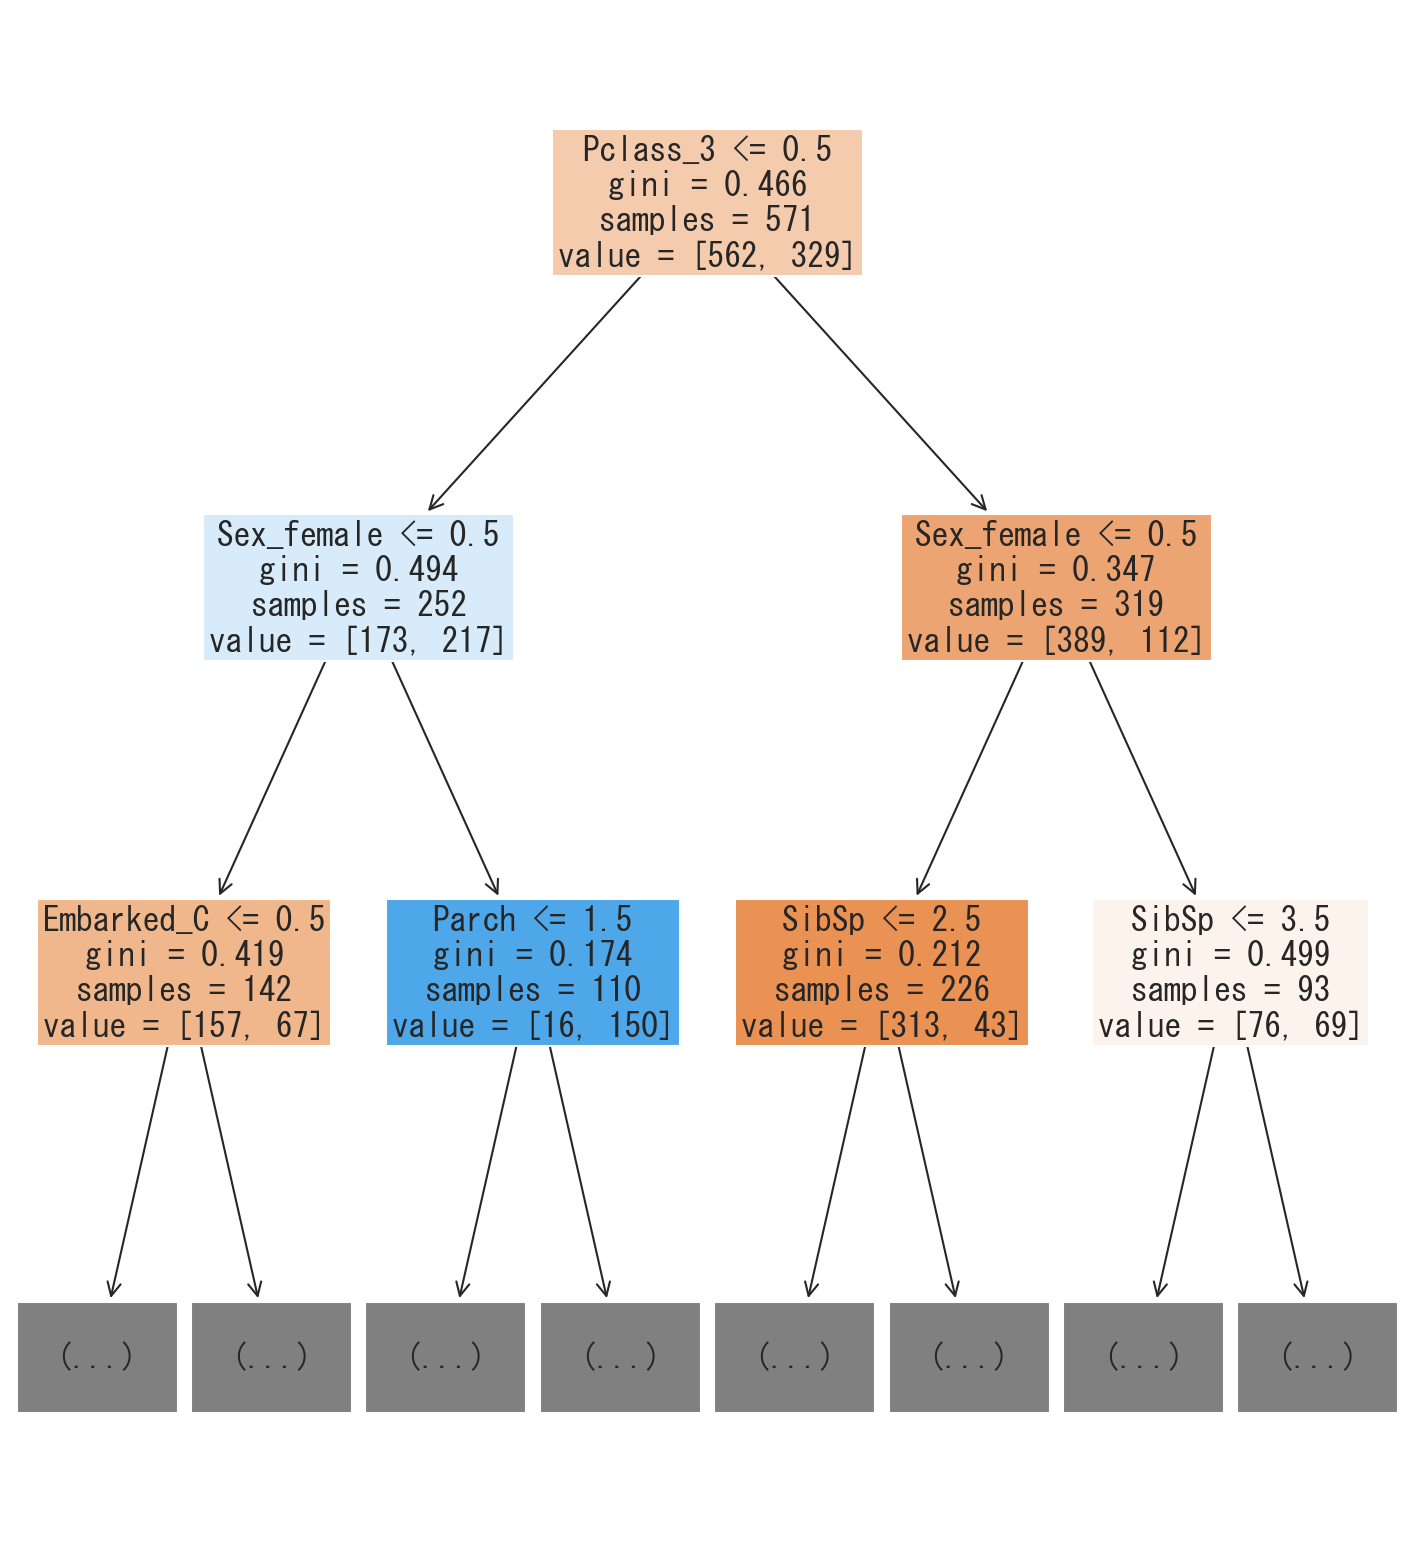

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18, 20))
plot_tree(model.estimators_[0], max_depth=2, fontsize=24, feature_names=train_labels, filled=True)
plt.show()

### 各特徴量が学習でどの程度重要になったかを可視化

In [ ]:
importance = model.feature_importances_
importance

array([0.08506099, 0.03506486, 0.03031918, 0.12282632, 0.28516426,
       0.24474112, 0.04779358, 0.0237022 , 0.08931359, 0.01469964,
       0.00718707, 0.01412719])

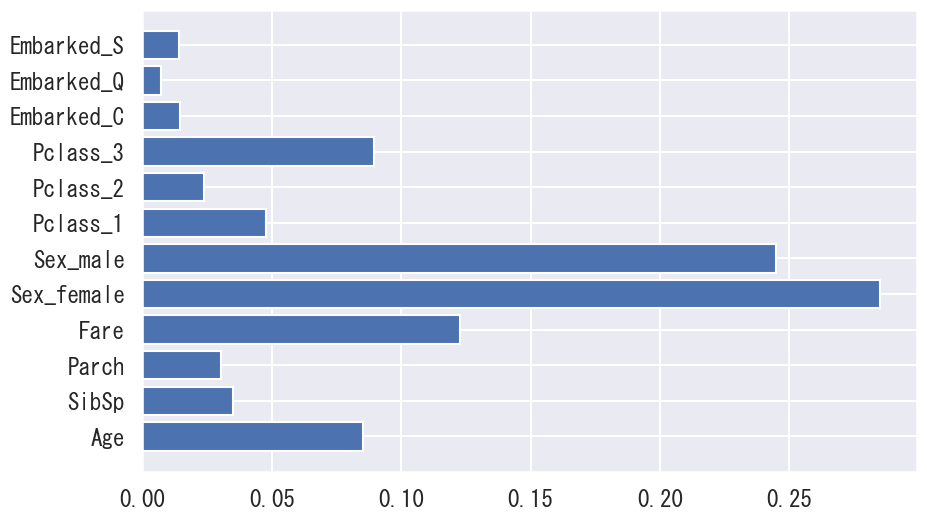

In [ ]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance)
plt.yticks(range(len(train_labels)), train_labels)
plt.show()

### Sex, Fare, Pclassが予測に大きな影響を与えている  
### Embarkedはあまり大きな影響を与えていない

### 予測・提出用データの作成

In [ ]:
# 予測
pred = model.predict(X_test)
pred[:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [ ]:
# 予測結果はint型で提出しなければならない
# int型になっているが、一応map関数を適応しておく
pred = list(map(int, pred))
pred[:5]

[0, 1, 0, 0, 1]

In [ ]:
survived_pred = pd.Series(pred, name="Survived")
survived_pred[:5]

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [ ]:
# 提出用のdataの作成
submit_data = pd.concat([test_id, survived_pred], axis=1)
submit_data.iloc[:5, :]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# 提出用のdataをcsv形式で保存
submit_data.to_csv("submit_data/Kaggle_titanic_2_Randomforest.csv", index=False)

2024/01/22  
・Kaggleのscoreは0.78468だった  
・Categoricalな特徴量をただ置き換えるのではなく、説明変数が増えてもpd.get_dummiesを使ったほうがよさそうだ